## Machine Learning

El objetivo es ajustar los parámetros de un modelo para que pueda hacer predicciones precisas basadas en datos de entrada. 
- Aprende patrones y relaciones a partir de datos históricos.
- Busca generalizar, es decir, funcionar bien en datos no vistos previamente.
- Se entrena minimizando una función de pérdida que mide el error entre las predicciones del modelo y los valores reales.

### Tipos de Machine Learning

- **Aprendizaje Supervisado**: El modelo se entrena con datos etiquetados, es decir, cada entrada tiene una salida conocida. Ejemplos incluyen clasificación y regresión.
- **Aprendizaje No Supervisado**: El modelo trabaja con datos no etiquetados y busca patrones o estructuras ocultas en los datos. Ejemplos incluyen clustering y reducción de dimensionalidad.
- **Aprendizaje por Refuerzo**: El modelo aprende a tomar decisiones mediante la interacción con un entorno, recibiendo recompensas o castigos según sus acciones.

Tambien tenemos que diferenciar entre:
- Classification: Cuando las salidas son categorías discretas.
- Regression: Cuando las salidas son valores continuos.
- Clustering: Agrupamiento de datos similares sin etiquetas predefinidas.
- Dimensionality Reduction: Reducción del número de variables en los datos manteniendo la mayor cantidad de información posible.

Pero claro si un modelo de clasificacion es demasiado grande puede ser tratado como un modelo de regresion.

### Pasos para desarrollar un modelo de Machine Learning

1. **Recolección de Datos**: Obtener un conjunto de datos relevante y representativo.
2. **Preprocesamiento de Datos**: Limpiar y transformar los datos para que sean adecuados para el entrenamiento del modelo.
3. **Selección del Modelo**: Elegir el algoritmo de Machine Learning adecuado según el problema y los datos.
4. **Entrenamiento del Modelo**: Ajustar los parámetros del modelo utilizando el conjunto de datos de entrenamiento.
5. **Evaluación del Modelo**: Medir el rendimiento del modelo utilizando un conjunto de datos de prueba y métricas adecuadas.
6. **Ajuste de Hiperparámetros**: Optimizar los hiperparámetros del modelo para mejorar su rendimiento.
7. **Despliegue del Modelo**: Implementar el modelo en un entorno de producción para hacer predicciones en tiempo real.
8. **Monitoreo y Mantenimiento**: Supervisar el rendimiento del modelo y actualizarlo según sea necesario para mantener su precisión.

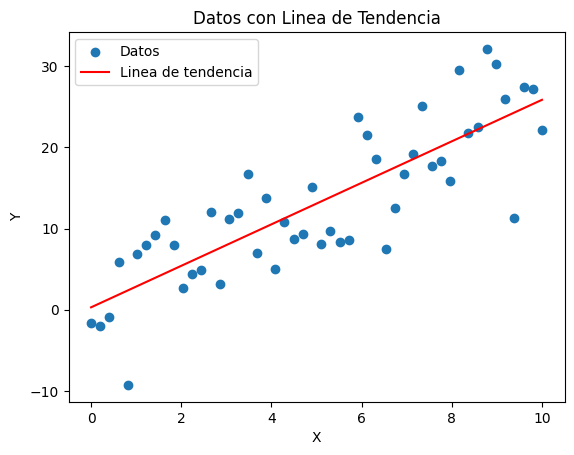

In [10]:
# vamos a simular datos
# conjunto de 50 datos aleatorios distribuidos linealmente (x,y) donde x es la variable independiente e y la dependiente

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2909)  # para reproducibilidad
x = np.linspace(0, 10, 50)
y = 2.5 * x + np.random.normal(0, 5, size
=x.shape)
# graficar los datos
# usar linea de tendencia
plt.scatter(x, y, label='Datos')
# ajustar una linea de tendencia
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', label='Linea de tendencia')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Datos con Linea de Tendencia')
plt.legend()
plt.show()

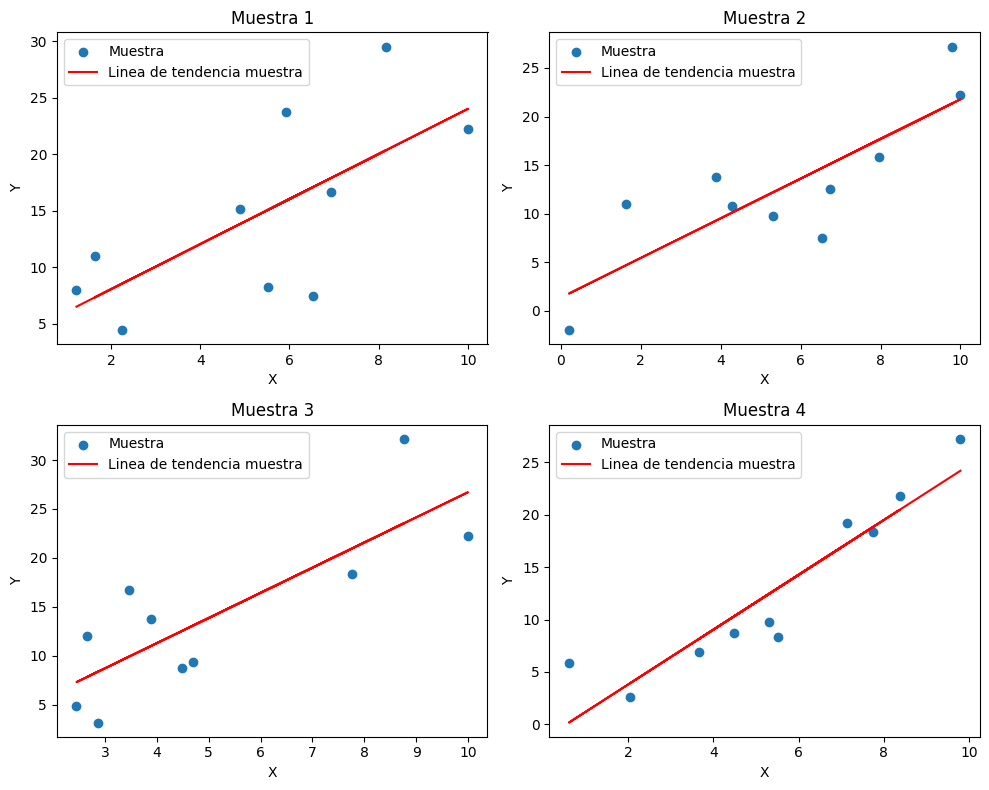

In [20]:
# vamos a tomar varias muestras de los datos y graficarlas en varias graficas
num_samples = 4
sample_size = 10
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i in range(num_samples):
    sample_indices = np.random.choice(len(x), size=sample_size, replace=False)
    x_sample = x[sample_indices]
    y_sample = y[sample_indices]
    ax = axs[i//2, i%2]
    ax.scatter(x_sample, y_sample, label='Muestra')
    m_s, b_s = np.polyfit(x_sample, y_sample, 1)
    ax.plot(x_sample, m_s*x_sample + b_s, color='red', label='Linea de tendencia muestra')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Muestra {i+1}')
    ax.legend()
plt.tight_layout()
plt.show()

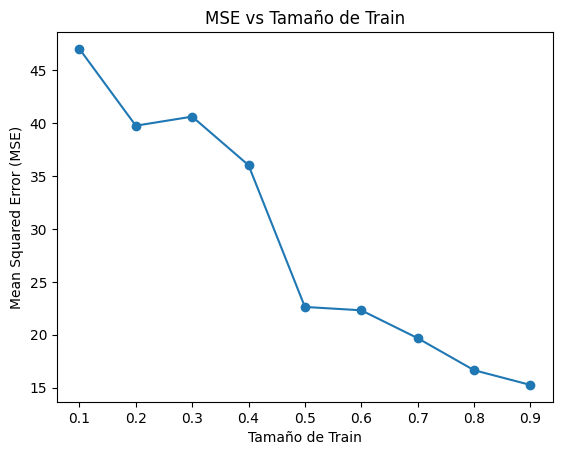

In [29]:
# hagamos un codigo para segmentar estos datos en train y test
# usamos train para hacer la regresion lineal y test para evaluar el modelo
# hagamos particiones de tamaño de train desde 10% hasta 90%.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
train_sizes = np.arange(0.1, 1.0, 0.1)
mse_values = []
for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, train_size=train_size, random_state=2909)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
# graficar mse vs tamaño de train
plt.plot(train_sizes, mse_values, marker='o')
plt.xlabel('Tamaño de Train')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Tamaño de Train')
plt.show()


Cuando el MSE es mayor entonces el modelo es peor, cuando es menor el modelo es mejor, es decir en este caso queremos minimizar el MSE, asi que lo mejor es entrenarlo con la mayor cantidad de datos posibles para que el MSE sea lo mas bajo posible.